In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [100]:
data = np.load('../bases/Titanic.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = data['X_treino'], data['X_teste'], data['y_treino'], data['y_teste'], list(data['feature_names'])

In [65]:
data_over = np.load('../bases/Titanic_over.npz', allow_pickle=True)
X_treino_over, X_teste_over, y_treino_over, y_teste_over, feature_names= data_over['X_treino'], data_over['X_teste'], data_over['y_treino'], data_over['y_teste'], list(data_over['feature_names'])

In [66]:
data_under = np.load('../bases/Titanic_under.npz', allow_pickle=True)
X_treino_under, X_teste_under, y_treino_under, y_teste_under, feature_names = data_under['X_treino'], data_under['X_teste'], data_under['y_treino'], data_under['y_teste'], list(data_under['feature_names'])

In [67]:
data_random_under = np.load('../bases/Titanic_random_under.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = data_random_under['X_treino'], data_random_under['X_teste'], data_random_under['y_treino'], data_random_under['y_teste'], list(data_random_under['feature_names'])

In [68]:
data_DSTO = np.load('../bases/Titanic_DSTO.npz', allow_pickle=True)
X_treino_DSTO, X_teste_DSTO, y_treino_DSTO, y_teste_DSTO, feature_names = data_DSTO['X_treino'], data_DSTO['X_teste'], data_DSTO['y_treino'], data_DSTO['y_teste'], list(data_DSTO['feature_names'])

## Parametros e funcoes

In [101]:
param_bayes = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
}

In [102]:
def plot_decision_tree(model, feature_names, class_names, title):
    plt.figure(figsize=(30, 15))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
    plt.title(title)
    plt.show()


# Modelos

### Modelo Padrao

In [103]:
bayes_search = BayesSearchCV(DecisionTreeClassifier(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 10, 'min_samples_split': 11})
Melhor pontuação de validação cruzada: 0.80


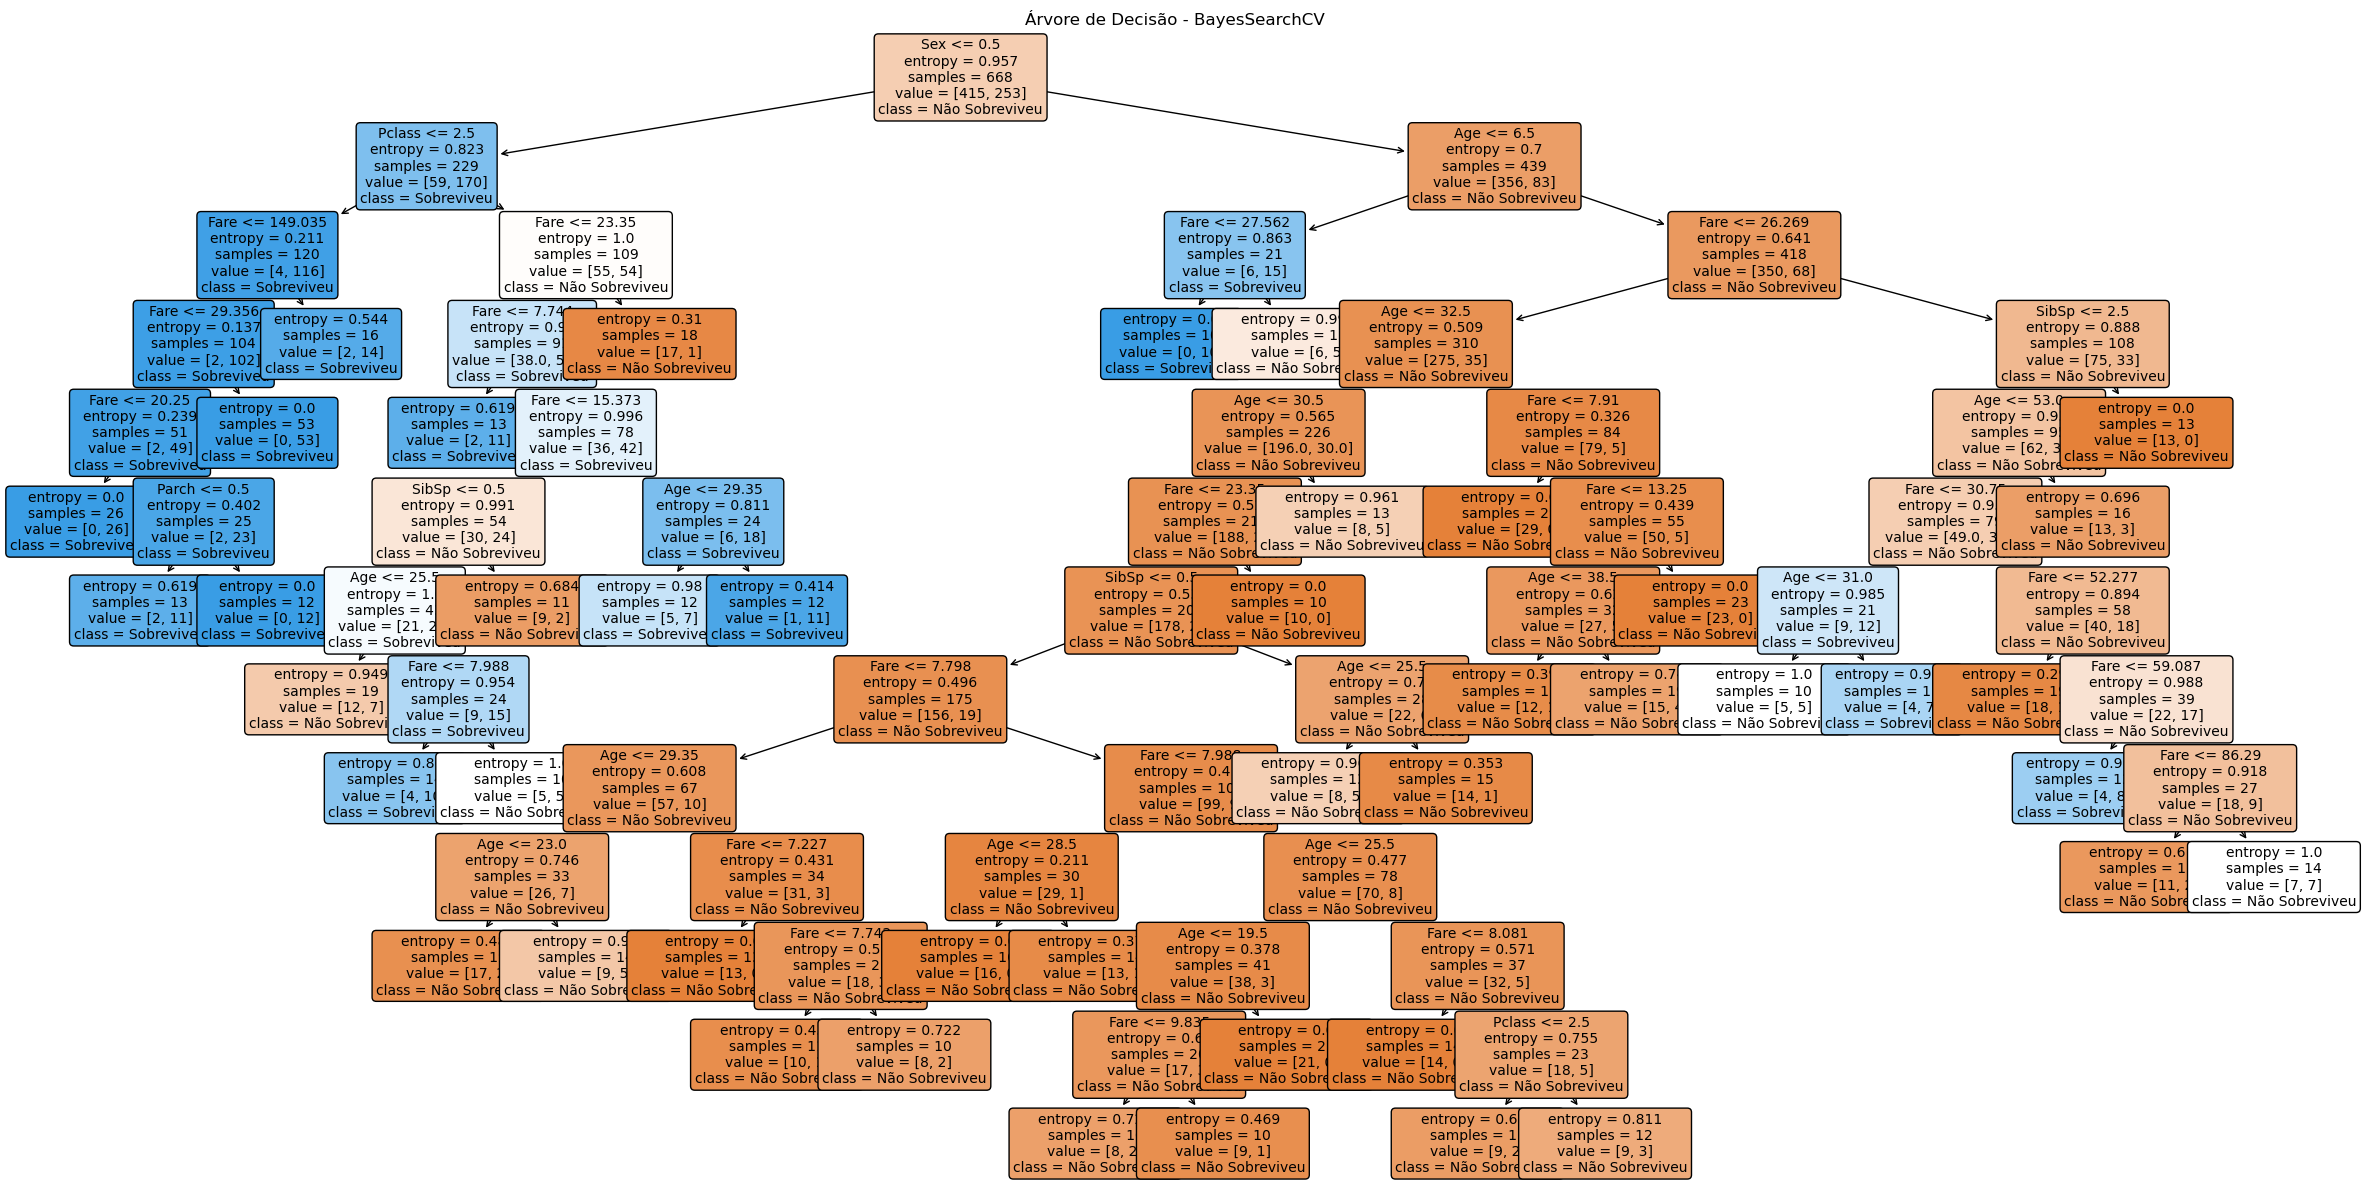

In [104]:
best_model_bayes = bayes_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Não Sobreviveu', 'Sobreviveu'], "Árvore de Decisão - BayesSearchCV")

In [105]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 0.79


In [106]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       134
           1       0.78      0.67      0.72        89

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



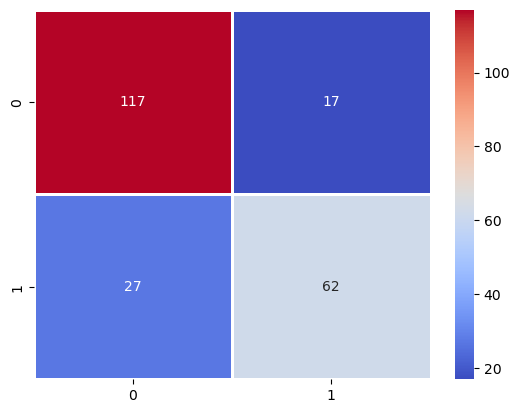

In [96]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

### OverSampling

In [76]:
bayes_search.fit(X_treino_over, y_treino_over)

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(), random_state=42,
              scoring='accuracy',
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize')})

In [77]:
best_model_bayes = bayes_search.best_estimator_
previsoes_bayes = best_model_bayes.predict(X_teste_over)

In [78]:
print(classification_report(y_teste_over, previsoes_bayes))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       107
           1       0.71      0.71      0.71        72

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



### UnderSampling

In [79]:
bayes_search.fit(X_treino_under, y_treino_under)

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(), random_state=42,
              scoring='accuracy',
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize')})

In [80]:
best_model_bayes = bayes_search.best_estimator_
previsoes_bayes = best_model_bayes.predict(X_teste_under)

In [81]:
print(classification_report(y_teste_under, previsoes_bayes))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       107
           1       0.73      0.68      0.71        72

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



### Random UnderSampling

In [82]:
bayes_search.fit(X_treino_rd_under, y_treino_rd_under)

/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['gini', 13, 1, 2] before, using random point ['gini', 37, 10, 16]
  warnings.warn(


BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(), random_state=42,
              scoring='accuracy',
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize')})

In [83]:
best_model_bayes = bayes_search.best_estimator_
previsoes_bayes = best_model_bayes.predict(X_teste_rd_under)

In [84]:
print(classification_report(y_teste_rd_under, previsoes_bayes))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       107
           1       0.71      0.68      0.70        72

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



### DSTO

In [85]:
bayes_search.fit(X_treino_DSTO, y_treino_DSTO)

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(), random_state=42,
              scoring='accuracy',
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize')})

In [86]:
best_model_bayes = bayes_search.best_estimator_
previsoes_bayes = best_model_bayes.predict(X_teste_DSTO)

In [87]:
print(classification_report(y_teste_DSTO, previsoes_bayes))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       107
           1       0.70      0.68      0.69        72

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

